In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Getting data from Internet and Describe data

In [4]:
df_red = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [5]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Get rid of the last column ‘quailty''

In [7]:
X = df_red.iloc[:,0:11]  

Since we need to find the most important two factors to the quality, we visualize the relations between each factor and we get 12*12 relationships. 

Especially, we pay attention to the last row, which show the relationships between each factor and quaility.

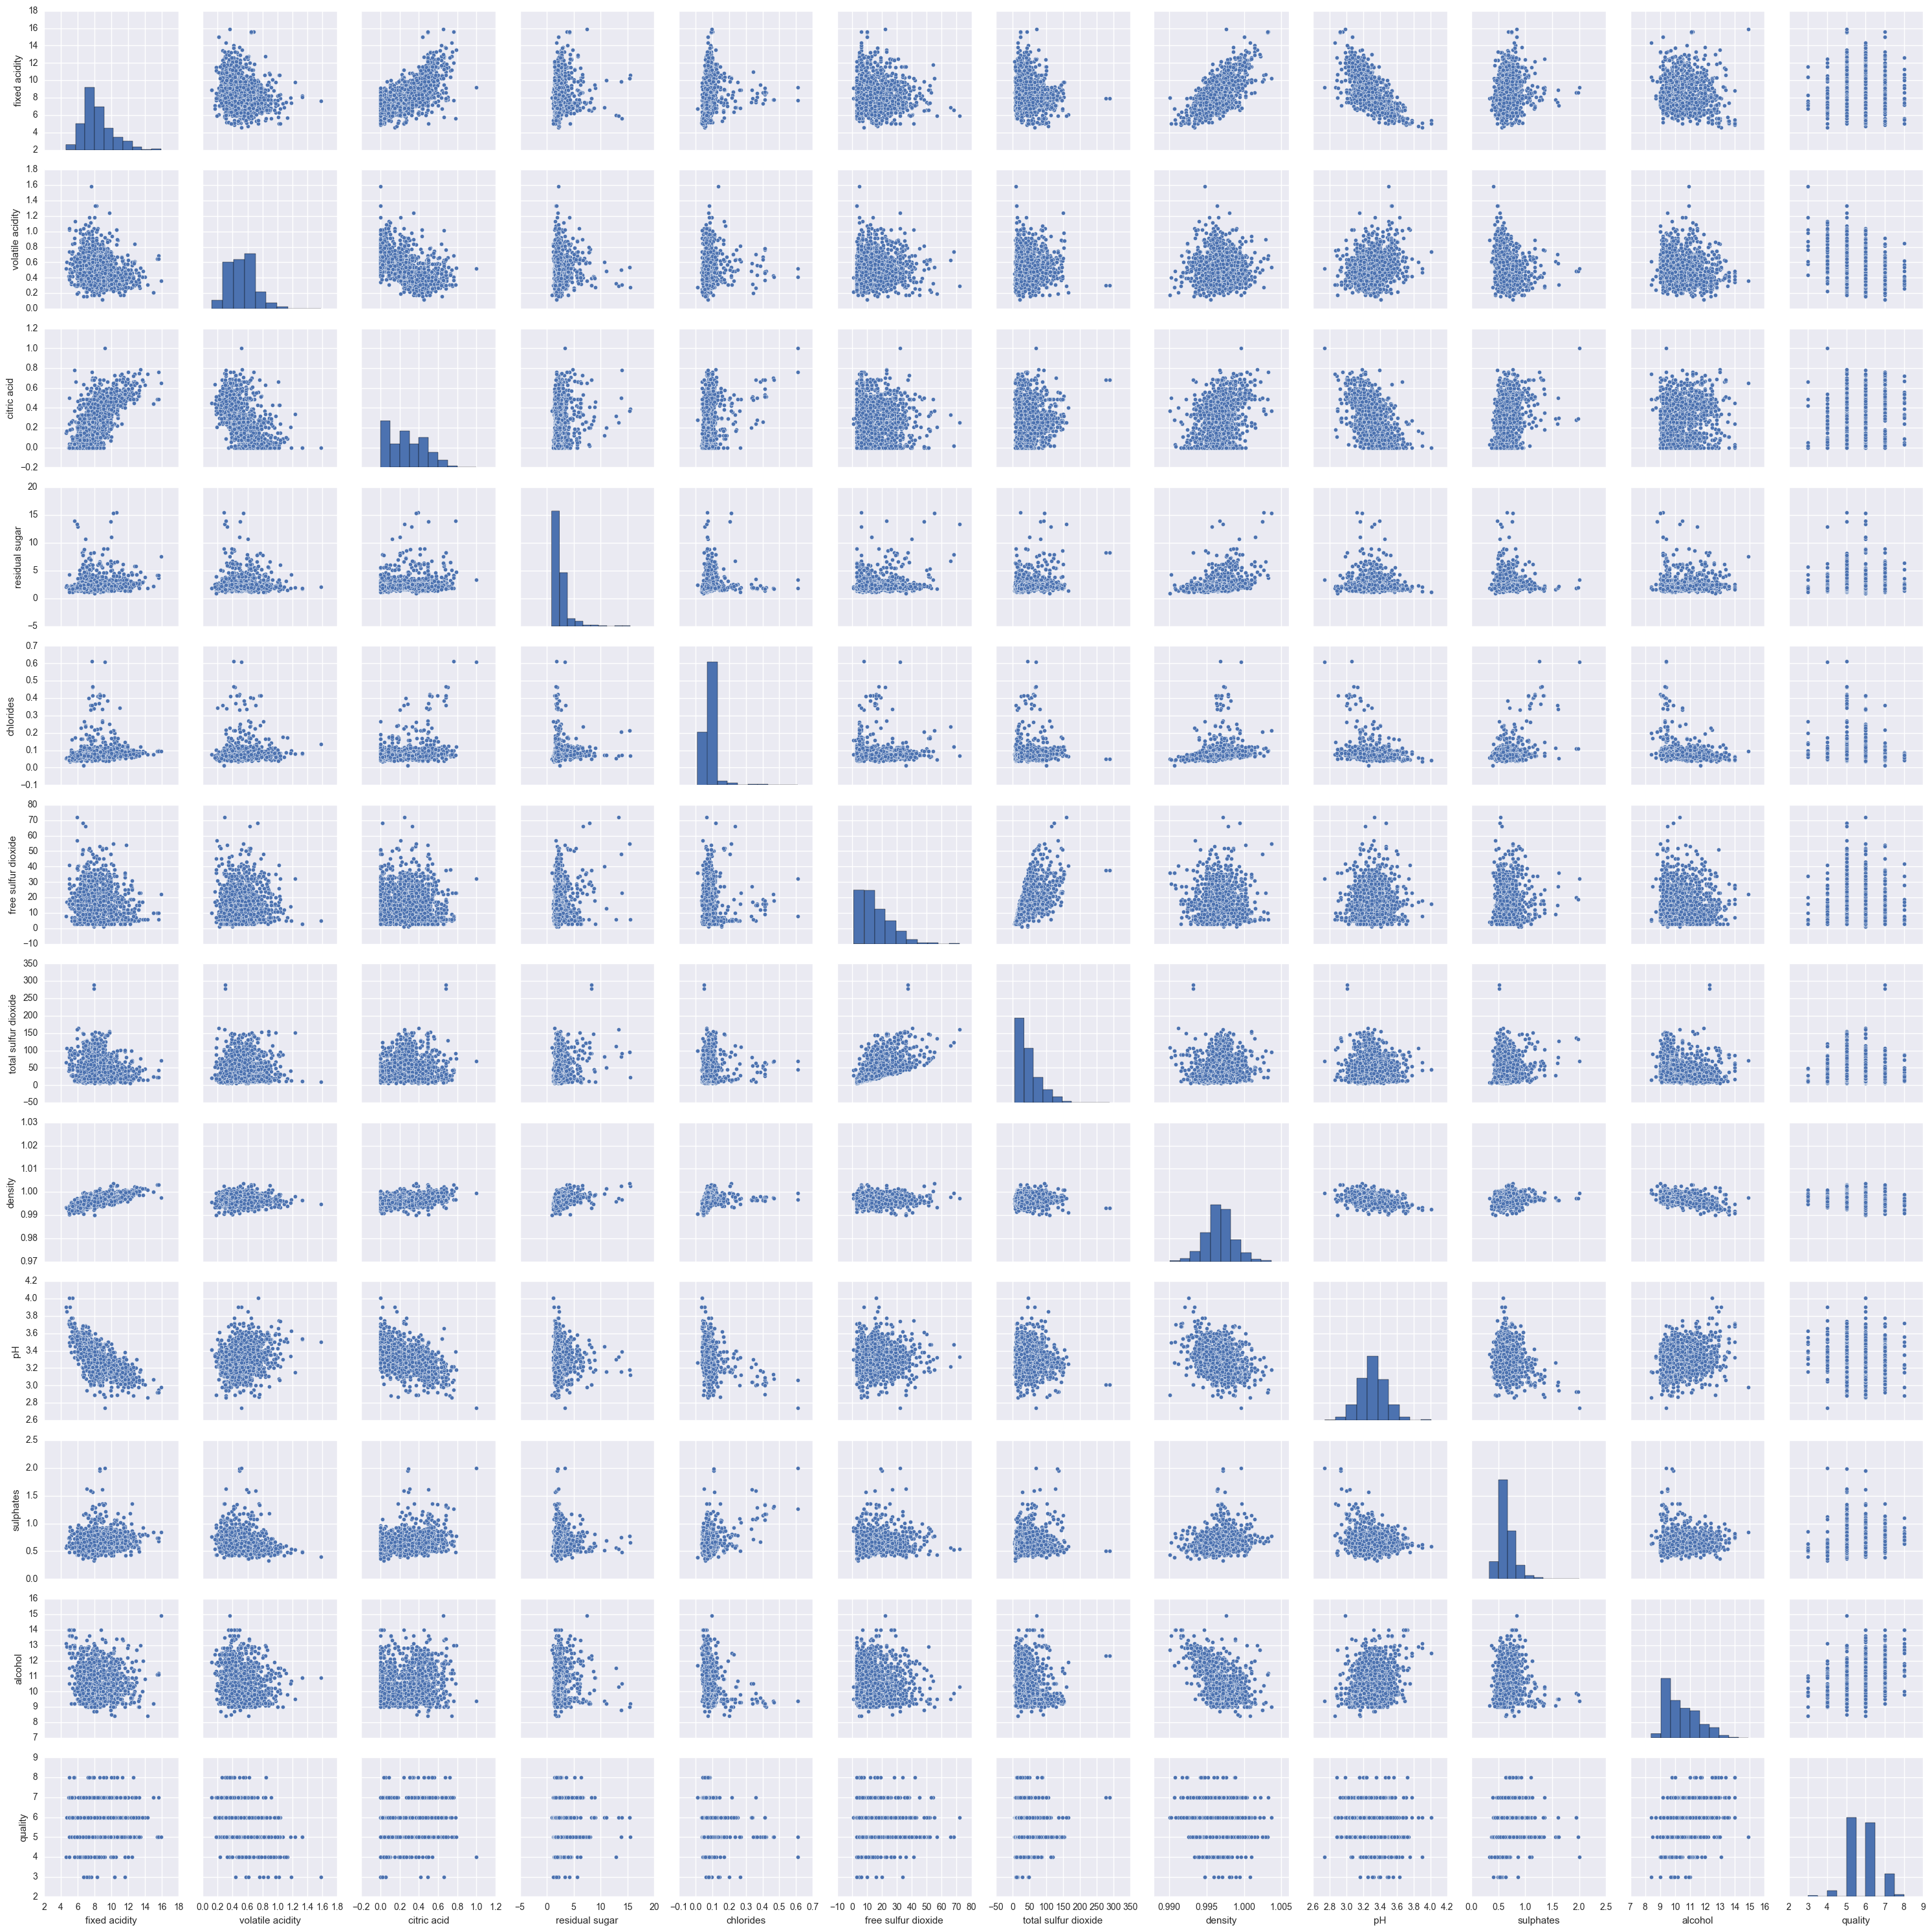

In [8]:
pair = sns.pairplot(df_red)
plt.show()

However, we can not find two factors that are superior to the others from above pictures.

For this reason, I try to learn the correlation coefficient matrix. In order to get better understanding, I visualize the result using confusion matrix.


In [9]:
corr=np.corrcoef(df_red)
corr

array([[ 1.        ,  0.98437206,  0.99325418, ...,  0.93011258,
         0.92436045,  0.98973524],
       [ 0.98437206,  1.        ,  0.99368451, ...,  0.95134026,
         0.95299963,  0.99213146],
       [ 0.99325418,  0.99368451,  1.        , ...,  0.92034963,
         0.91925422,  0.986887  ],
       ..., 
       [ 0.93011258,  0.95134026,  0.92034963, ...,  1.        ,
         0.99882879,  0.96635593],
       [ 0.92436045,  0.95299963,  0.91925422, ...,  0.99882879,
         1.        ,  0.96297293],
       [ 0.98973524,  0.99213146,  0.986887  , ...,  0.96635593,
         0.96297293,  1.        ]])

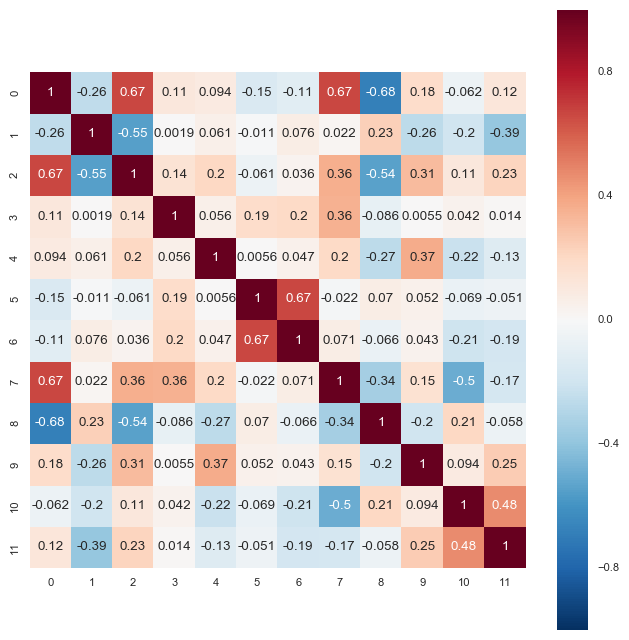

In [33]:
f, axes = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
cm = np.corrcoef(df_red[df_red.columns].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,)
plt.show()

From the picture we can find that the second factor(volatile acidity) and the last factor (alcohol) are the most important.

Then, we start to split the train and test data sets.

In [10]:
y=(df_red['quality'].values > 6)
x=X.loc[:,['volatile acidity','alcohol']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

Desion tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=0)
tree.fit(x_train, y_train)
    
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
    
print('decision tree: train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

decision tree: train/test accuracies 0.872/0.890


Visualization

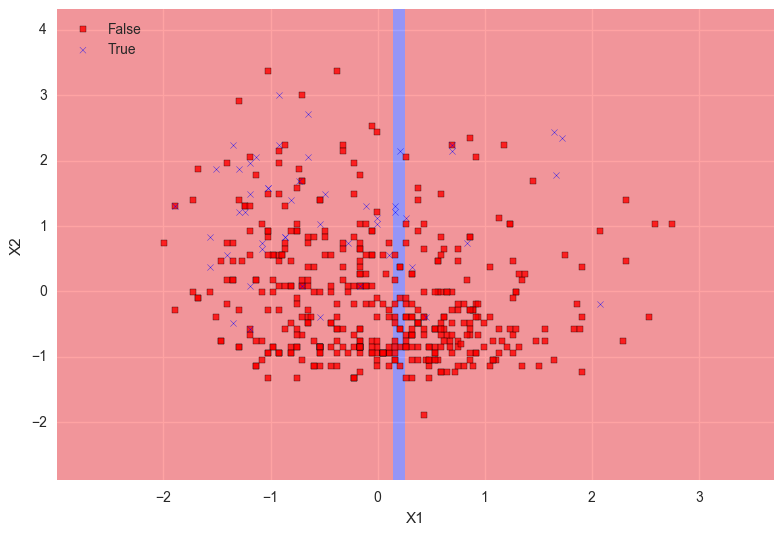

In [21]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

    
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)
    
x1_min, x1_max = x_test_std[:, 0].min() - 1, x_test_std[:, 0].max() + 1
x2_min, x2_max = x_test_std[:, 1].min() - 1, x_test_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))

Z = tree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_std[y_test == cl, 0], y=x_test_std[y_test == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Bagging based on estimator=decision tree, test accuracy

In [23]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree,bootstrap=True, bootstrap_features=False, n_jobs=1)

bag.fit(x_train, y_train)
    
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
    
print('decision tree bagging: train/test accuracies %.3f/%.3f'% (bag_train, bag_test))

decision tree bagging: train/test accuracies 0.882/0.877


Visualization

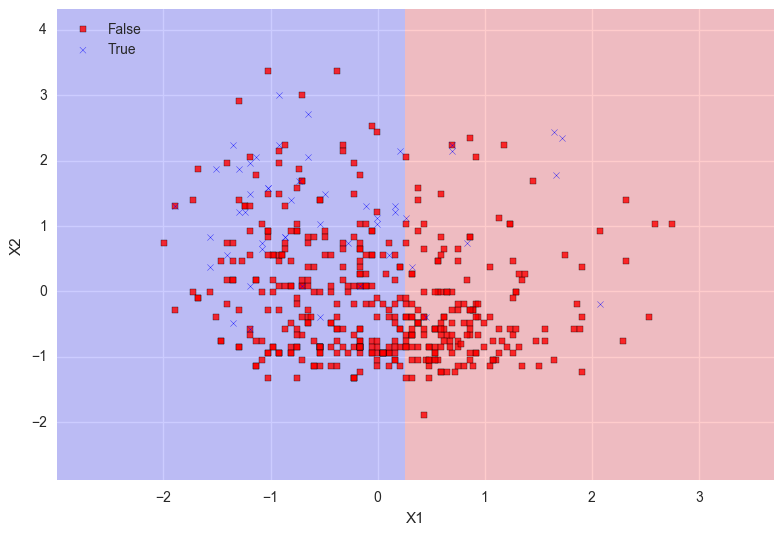

In [25]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)
    
x1_min, x1_max = x_test_std[:, 0].min() - 1, x_test_std[:, 0].max() + 1
x2_min, x2_max = x_test_std[:, 1].min() - 1, x_test_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))

Z = bag.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_std[y_test == cl, 0], y=x_test_std[y_test == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Adaboost based on estimator=decision tree, test accuracy

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree,learning_rate=0.3,random_state=0)

ada.fit(x_train, y_train)
    
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
    
print('decision tree adaboost: train/test accuracies %.3f/%.3f'% (ada_train, ada_test))


decision tree adaboost: train/test accuracies 0.974/0.860


Visualization

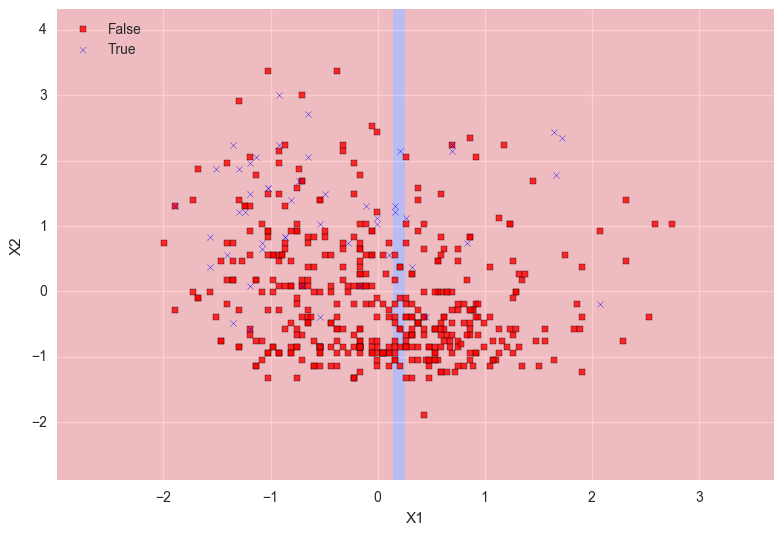

In [27]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)
    
x1_min, x1_max = x_test_std[:, 0].min() - 1, x_test_std[:, 0].max() + 1
x2_min, x2_max = x_test_std[:, 1].min() - 1, x_test_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))

Z = ada.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_std[y_test == cl, 0], y=x_test_std[y_test == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Randomforest based on estimator=decision tree, test accuracy

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=2, random_state=1,)

rf.fit(x_train, y_train)
    
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)
    
print('decision tree random forest: train/test accuracies %.3f/%.3f'% (rf_train, rf_test))


decision tree random forest: train/test accuracies 0.931/0.875


Visualization

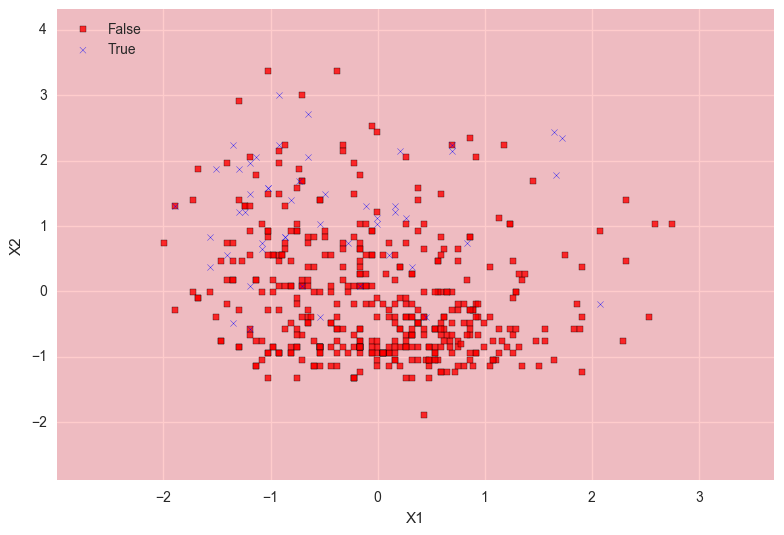

In [29]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)
    
x1_min, x1_max = x_test_std[:, 0].min() - 1, x_test_std[:, 0].max() + 1
x2_min, x2_max = x_test_std[:, 1].min() - 1, x_test_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))

Z = rf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_std[y_test == cl, 0], y=x_test_std[y_test == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()